In [ ]:
#random forest

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r'C:\Users\LENOVO\Documents\GitHub\Data-mining-project\datasets_final\final_dataset.csv')
print(df.head())

   region  danceability  energy  key  loudness  mode  speechiness  \
0       3         0.685   0.644   10   -13.206     0       0.1550   
1       3         0.752   0.620    5    -5.536     1       0.0509   
2       1         0.748   0.627    7    -6.029     1       0.0639   
3       2         0.748   0.627    7    -6.029     1       0.0639   
4       3         0.748   0.627    7    -6.029     1       0.0639   

   acousticness  instrumentalness  liveness  valence    tempo  duration_ms  \
0         0.302          0.000055    0.1140    0.808  164.919       169379   
1         0.309          0.000000    0.0750    0.962  117.399       164459   
2         0.131          0.000000    0.0852    0.524  120.963       188491   
3         0.131          0.000000    0.0852    0.524  120.963       188491   
4         0.131          0.000000    0.0852    0.524  120.963       188491   

   time_signature  popular  
0               4        0  
1               4        0  
2               4        0  


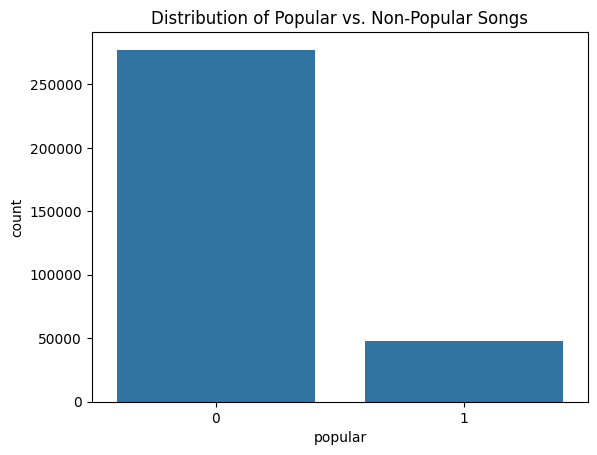

In [4]:
import seaborn as sns

sns.countplot(x='popular', data=df)
plt.title('Distribution of Popular vs. Non-Popular Songs')
plt.show()


In [11]:
#Split the data into features and target variable
X = df.drop(columns=['popular'])  # Features
y = df['popular']  # Target variable

In [9]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [19]:
from sklearn.model_selection import cross_val_score

#Initialize the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
#Perform cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5)  # 5-fold cross-validation

#Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train and Test Predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Training set performance
print("Training Set:")
print("Accuracy:", accuracy_score(y_train, y_train_pred))

# Test set performance
print("Test Set:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))


Training Set:
Accuracy: 0.992725509214355
Test Set:
Accuracy: 0.8523855711052607


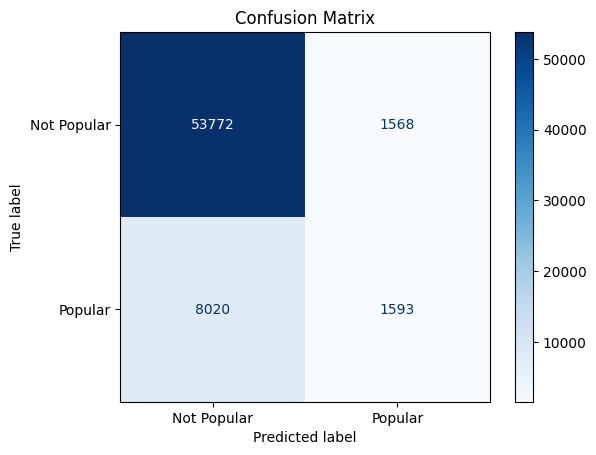

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = rf_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Popular', 'Popular'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [13]:
# Make predictions and evaluate the model
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8523855711052607
              precision    recall  f1-score   support

           0       0.87      0.97      0.92     55340
           1       0.50      0.17      0.25      9613

    accuracy                           0.85     64953
   macro avg       0.69      0.57      0.58     64953
weighted avg       0.82      0.85      0.82     64953



In [39]:
region_analysis = df.groupby('region').mean()

print(region_analysis)


        danceability    energy       key  loudness      mode  speechiness  \
region                                                                      
0           0.686295  0.619734  5.206424 -7.608736  0.507380     0.137555   
1           0.603382  0.629306  5.294207 -6.861704  0.678162     0.079573   
2           0.661498  0.641239  5.287374 -7.342089  0.540551     0.129643   
3           0.663322  0.660444  5.356673 -6.707045  0.592774     0.105519   
4           0.642029  0.611241  5.288157 -7.634013  0.461966     0.104671   
5           0.657891  0.620176  5.185422 -6.990812  0.609833     0.131226   
6           0.642139  0.635878  5.316541 -7.348868  0.562723     0.108689   
7           0.647060  0.630660  5.223630 -7.050239  0.608444     0.115602   
8           0.622576  0.583866  5.239207 -7.393087  0.658991     0.081898   
9           0.649298  0.646239  5.306584 -7.021315  0.563503     0.119060   
10          0.669418  0.642748  5.338206 -7.263375  0.525084     0.145118   

In [40]:
import numpy as np

importance = rf_model.feature_importances_
indices = np.argsort(importance)[::-1]
features = X.columns

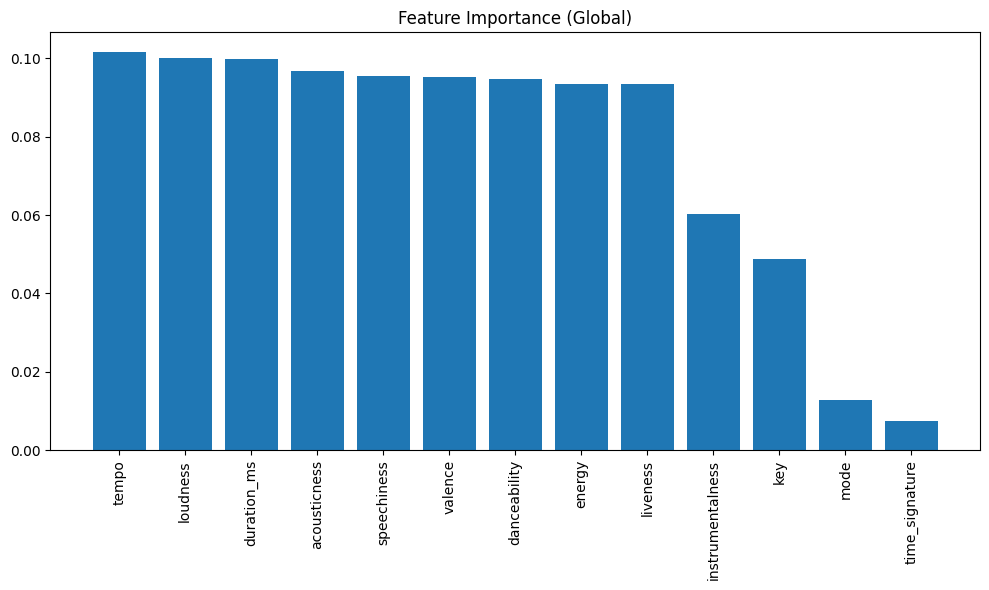

In [41]:
# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance (Global)")
plt.bar(range(X.shape[1]), importance[indices], align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()

In [5]:
df = pd.read_csv(r'C:\Users\noemi\Documents\GitHub\Data-mining-project\datasets_final\final_dataset.csv')

In [4]:
import pandas as pd

In [6]:
# Create a dictionary to map region codes to region names
region_names = {
    0: 'Africa',
    1: 'East Asia',
    2: 'Eastern Europe',
    3: 'Latin America',
    4: 'Middle East',
    5: 'North America',
    6: 'Northern Europe',
    7: 'Oceania',
    8: 'South Asia',
    9: 'Southern Europe',
    10: 'Western Europe'
}

# Get the unique regions from your dataset
regions = df['region'].unique()


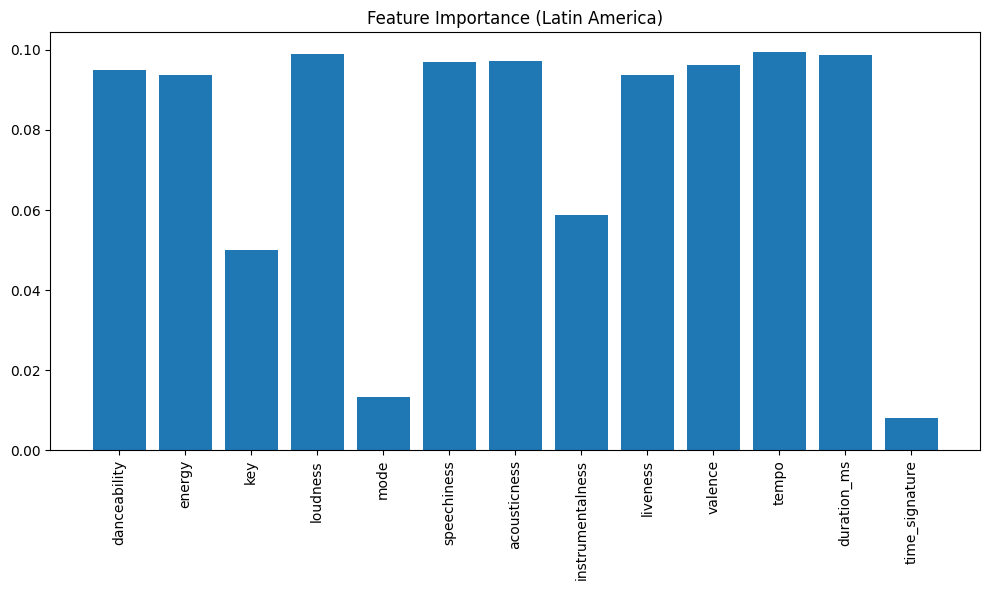

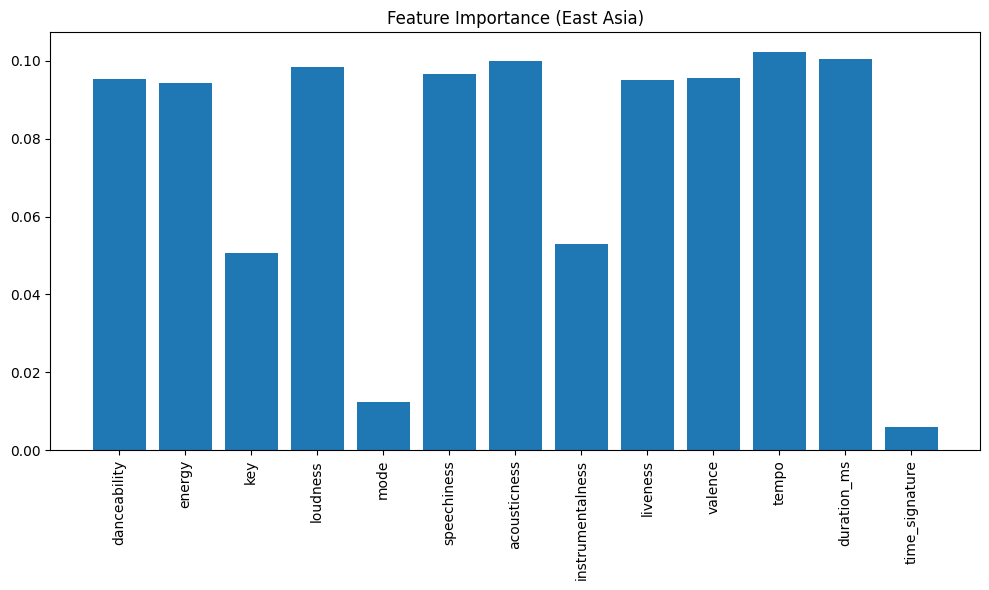

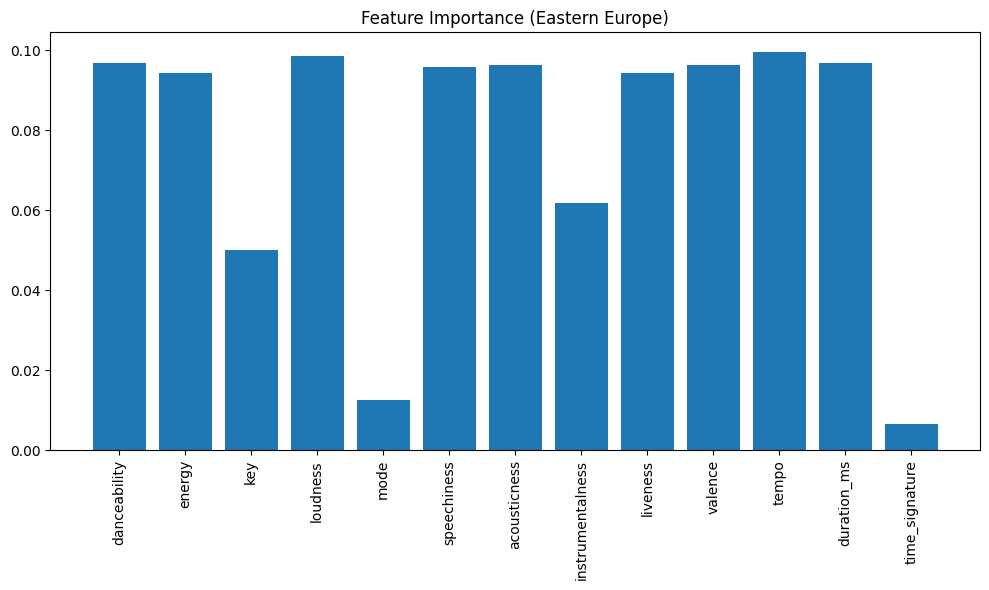

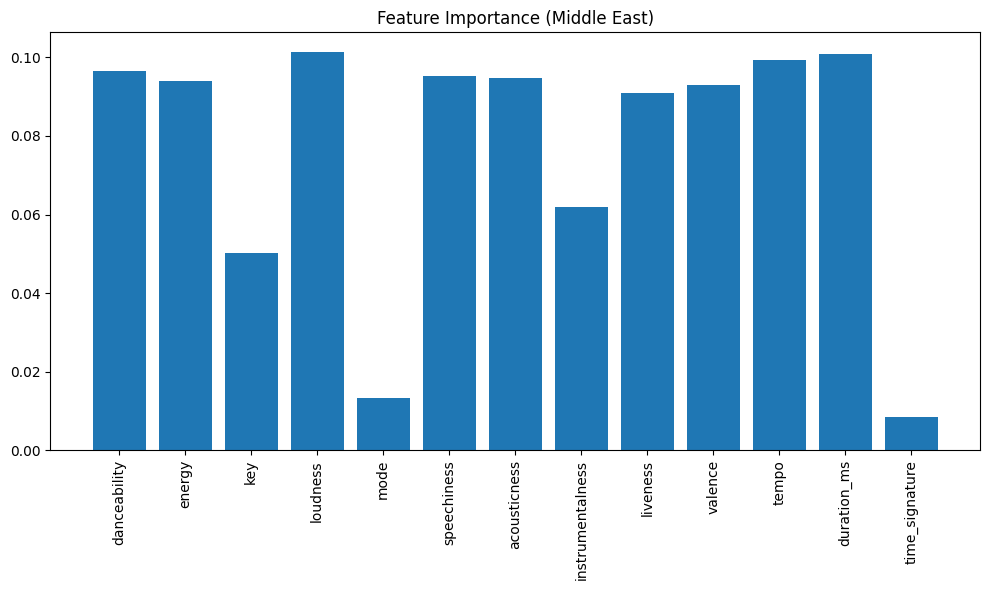

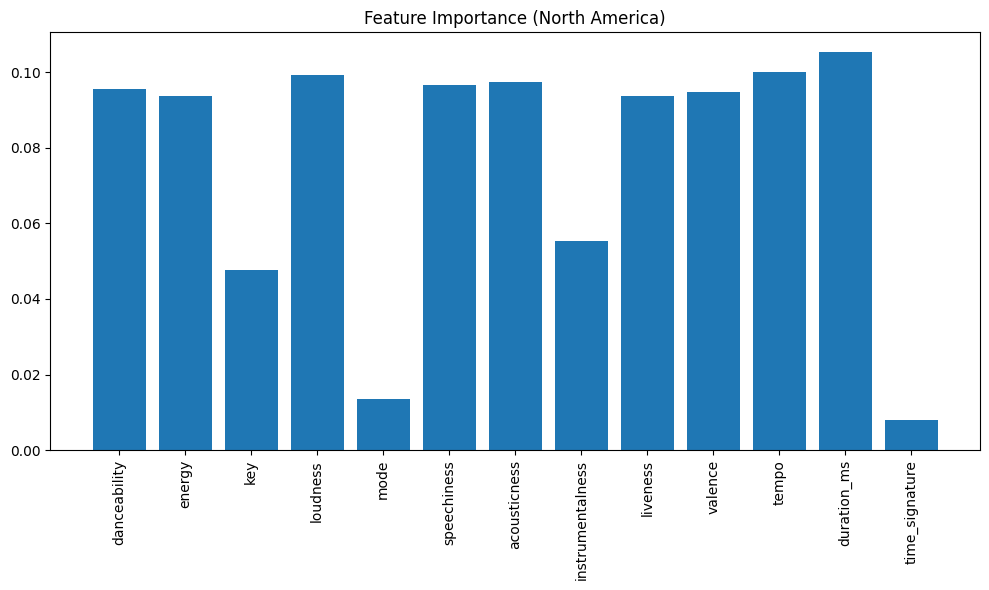

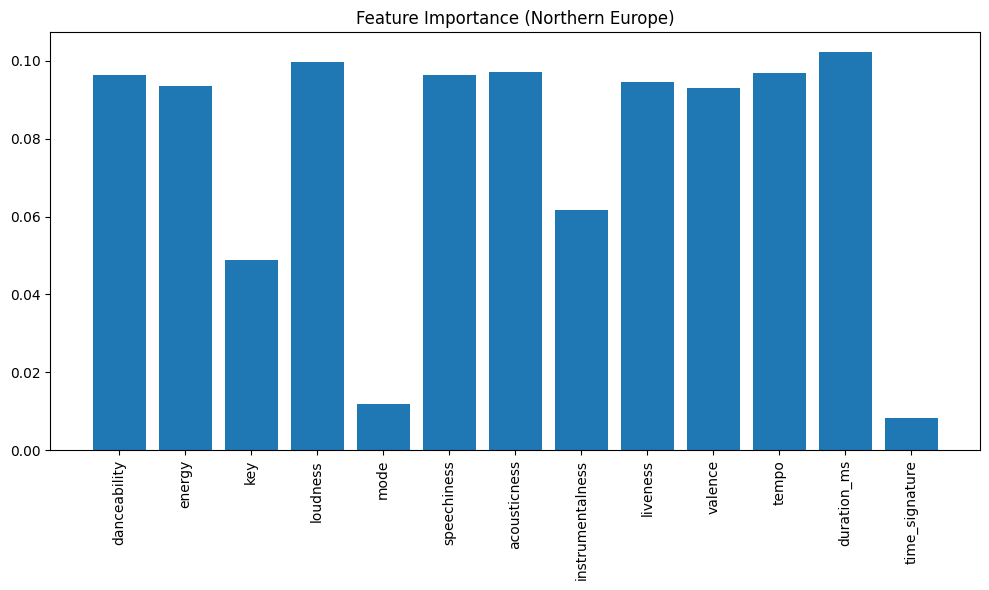

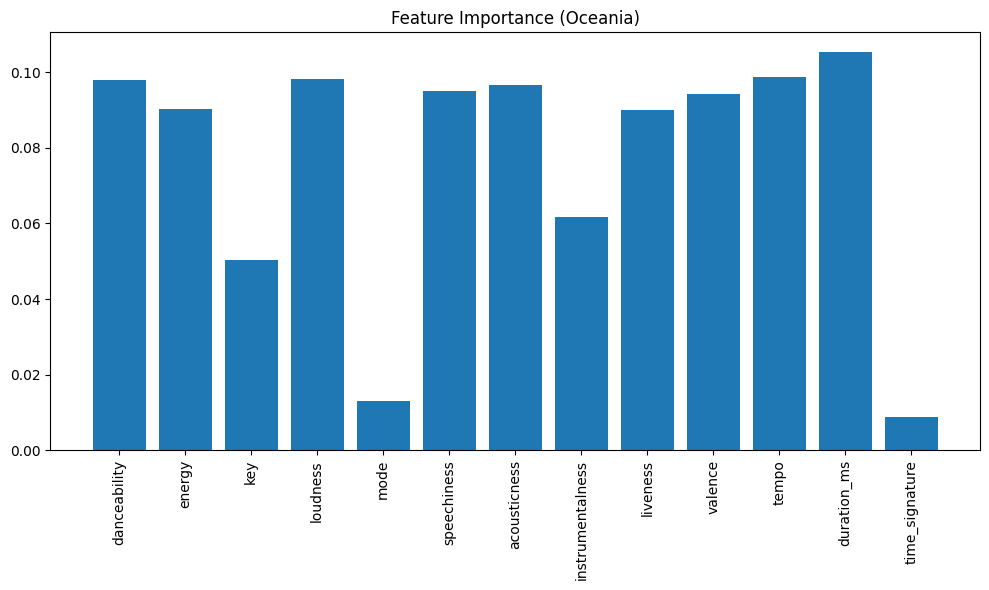

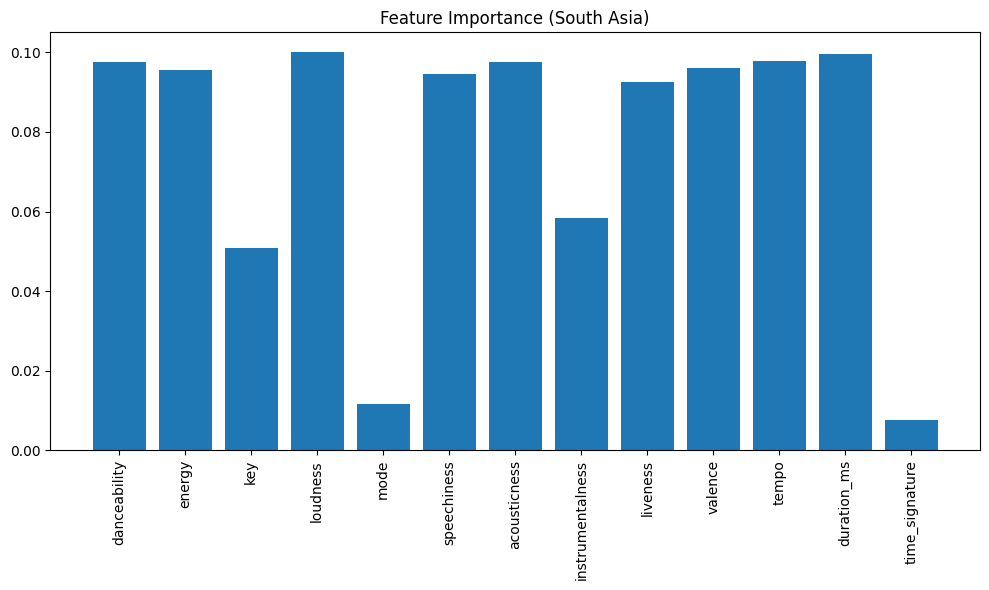

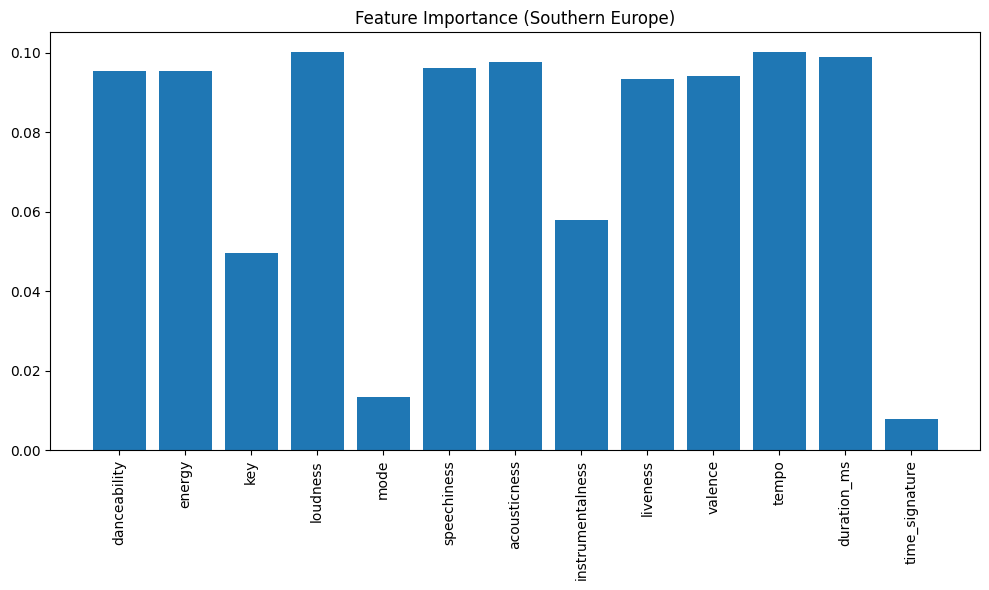

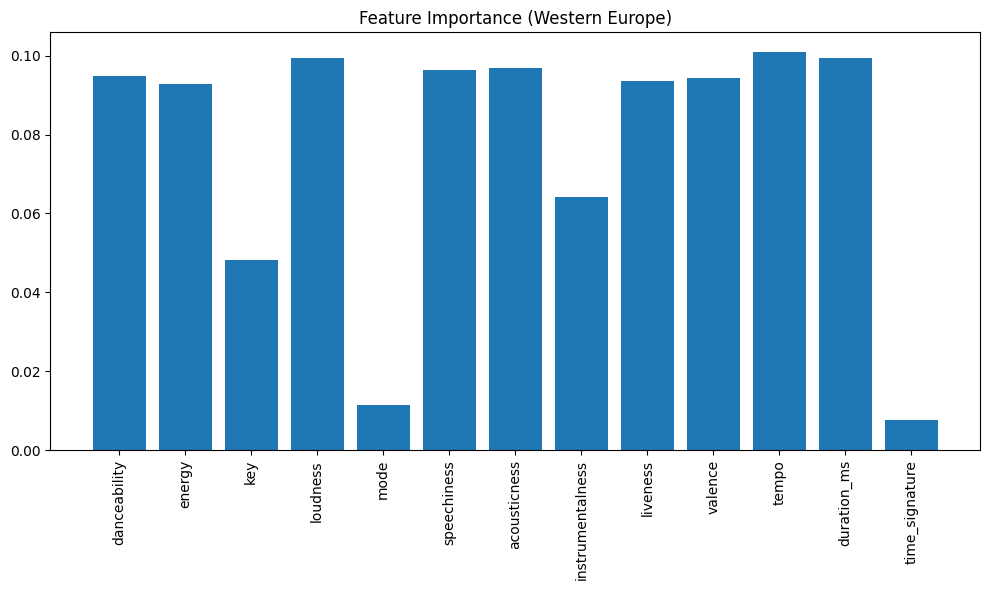

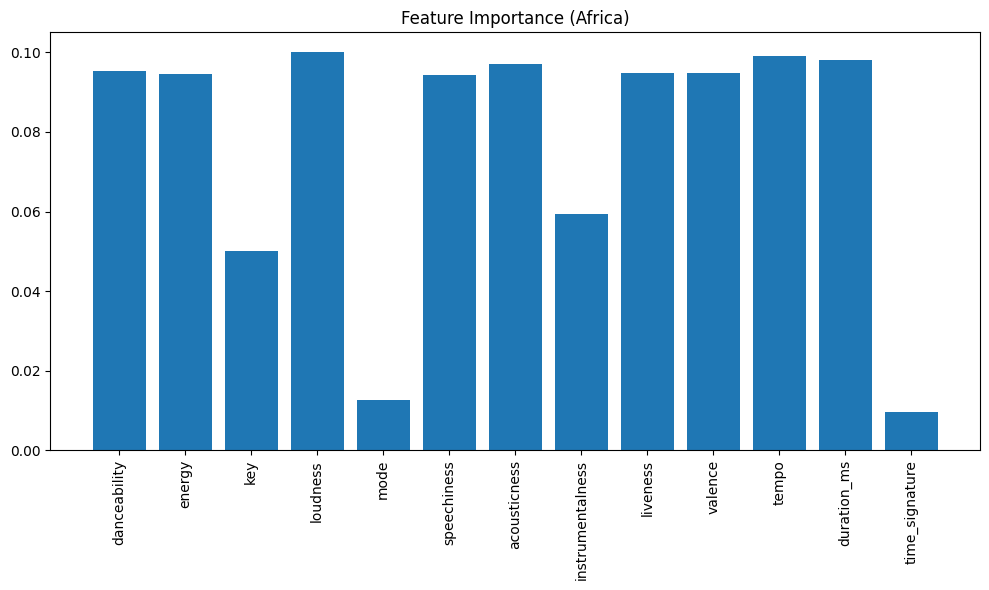

In [21]:
for region in regions:
    # Filter data for the specific region
    region_data = df[df['region'] == region]
    
    # Prepare features and target
    X_region = region_data.drop(['region', 'popular'], axis=1)  # Features for this region
    y_region = region_data['popular']  # Target (popularity)

    # train a model for this region
    rf_model_region = RandomForestClassifier(random_state=42)
    rf_model_region.fit(X_region, y_region)

    # Get feature importances
    feature_importances_region = rf_model_region.feature_importances_

    #get the name of the region from the dictionary
    region_name = region_names.get(region, f"Region {region}")

    # Plot the feature importance
    plt.figure(figsize=(10, 6))
    plt.title(f"Feature Importance ({region_name})")
    plt.bar(range(X_region.shape[1]), feature_importances_region, align='center')
    plt.xticks(range(X_region.shape[1]), X_region.columns, rotation=90)
    plt.tight_layout()
    plt.show()

In [45]:
# Define a threshold for selecting "important" features
importance_threshold = 0.1  # Only consider features with importance > 0.1 as important

for region in regions:
    # Filter data for the specific region
    region_data = df[df['region'] == region]
    
    # Prepare features and target
    X_region = region_data.drop('popular', axis=1)  # Features for this region
    y_region = region_data['popular']  # Target (popularity)

    # train a model for this region
    rf_model_region = RandomForestClassifier(random_state=42)
    rf_model_region.fit(X_region, y_region)

    # Get feature importances
    feature_importances_region = rf_model_region.feature_importances_

    # Get the important features
    important_features_indices = np.where(feature_importances_region > importance_threshold)[0]
    important_features = X_region.columns[important_features_indices]

    #Calculate and display mean values for important features
    region_name = region_names[region]  # Get the region name from the dictionary
    print(f"\nRegion: {region_name} (Code {region}) - Important Features and Their Mean Values:")
    
    for feature in important_features:
        mean_value = region_data[feature].mean()  # Calculate mean value for this feature in the region
        print(f"Feature: {feature}, Mean Value: {mean_value:.2f}")



Region: Latin America (Code 3) - Important Features and Their Mean Values:
Feature: tempo, Mean Value: 122.61

Region: East Asia (Code 1) - Important Features and Their Mean Values:
Feature: loudness, Mean Value: -6.86
Feature: tempo, Mean Value: 121.52
Feature: duration_ms, Mean Value: 229571.73

Region: Eastern Europe (Code 2) - Important Features and Their Mean Values:

Region: Middle East (Code 4) - Important Features and Their Mean Values:
Feature: duration_ms, Mean Value: 213894.57

Region: North America (Code 5) - Important Features and Their Mean Values:
Feature: loudness, Mean Value: -6.99
Feature: duration_ms, Mean Value: 206987.98

Region: Northern Europe (Code 6) - Important Features and Their Mean Values:
Feature: duration_ms, Mean Value: 203514.75

Region: Oceania (Code 7) - Important Features and Their Mean Values:
Feature: duration_ms, Mean Value: 213396.98

Region: South Asia (Code 8) - Important Features and Their Mean Values:
Feature: loudness, Mean Value: -7.39
Fea

In [46]:
# Loop through each region and check the importance of danceability
for region in regions:
    # Filter data for the specific region
    region_data = df[df['region'] == region]
    
    # Prepare features and target
    X_region = region_data.drop('popular', axis=1)  # Features for this region
    y_region = region_data['popular']  # Target (popularity)

    # train a model for this region
    rf_model_region = RandomForestClassifier(random_state=42)
    rf_model_region.fit(X_region, y_region)

    # Get feature importances
    feature_importances_region = rf_model_region.feature_importances_

    # Get the index of the 'danceability' feature
    feature_names = X_region.columns
    danceability_index = list(feature_names).index('danceability')
    
    # Check if danceability is an important feature
    if feature_importances_region[danceability_index] > importance_threshold:
        region_name = region_names.get(region, f"Region {region}")
        print(f"Danceability is an important feature in {region_name}.")

In [14]:
# Example new song features
new_song_data = {
    'region': 1,  
    'danceability': 0.591,
    'energy': 0.903,
    'key': 2,               
    'loudness': -4.102,
    'mode': 1,
    'speechiness': 0.0312,
    'acousticness': 0.000607,
    'instrumentalness': 0.0,
    'liveness': 0.183,
    'valence': 0.512,
    'tempo': 103.992,
    'duration_ms': 273307,
    'time_signature': 4
}

#Create a DataFrame
new_song_df = pd.DataFrame([new_song_data], columns=X.columns)

# Scale the new song data using the fitted scaler
new_song_scaled = scaler.transform(new_song_df)

# Make prediction
predicted_popularity = rf_model.predict(new_song_scaled)

# Output the prediction
if predicted_popularity[0] == 1:
    print("The new song is predicted to be popular.")
else:
    print("The new song is predicted to be not popular.")


The new song is predicted to be popular.


In [10]:
import joblib

# Assuming 'rf' is your trained model
joblib.dump(rf_model, 'random_forest_model.pkl')


['random_forest_model.pkl']